# Задание 5

### Исходный сигнал
Воспользуемся кодом из третьего задания для получения исходного сигнала с заданными параметрами

In [31]:
import numpy as np
from matplotlib import pyplot as plt


RATE = 44100  # частота дискретизации
DURATION = 5 # длительность сигнала 

def generate_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin(2 * np.pi * frequencies)
    return x, y


f_0 = 100  # f_0 - КГц
x, y = generate_wave(f_0, RATE, DURATION)

## Амплитудная гармоническая модуляция

Согласно формуле, $u_{am}(t) = F_m(1 + m u_m(t))$.

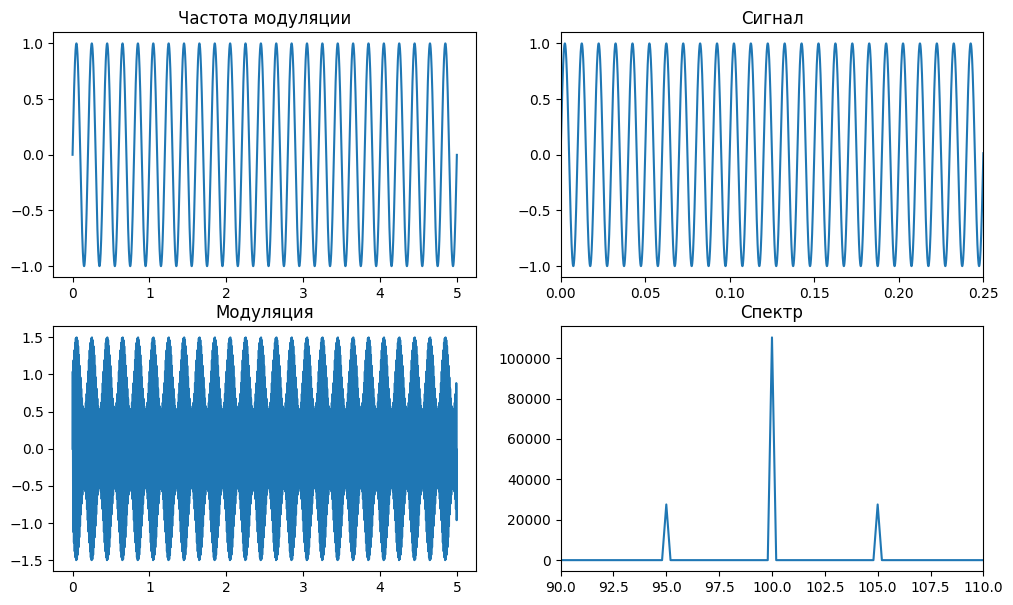

In [32]:
from scipy.fft import rfft, rfftfreq


F_m = 5  # F_m - КГц
m = 0.5

x, u_m = generate_wave(F_m, RATE, DURATION)
u_am = y * (1 + m * u_m)

N = RATE * DURATION

y_spectrum = rfft(u_am)
x_spectrum = rfftfreq(N, 1 / RATE)

fig = plt.figure(figsize=(12, 7))
ax1 = fig.add_subplot(221)
ax1.plot(x, u_m)
ax1.set_title("Частота модуляции")
ax2 = fig.add_subplot(222)
ax2.plot(x, y)
ax2.set_xlim([0, 0.25])
ax2.set_title("Сигнал")
ax3 = fig.add_subplot(223)
ax3.plot(x, u_am)
ax3.set_title("Модуляция")
ax4 = fig.add_subplot(224)
ax4.plot(x_spectrum, np.abs(y_spectrum))
ax4.set_xlim([f_0 * 0.9, f_0 * 1.1])
ax4.set_title("Спектр")
plt.show()

Частота ($\omega_c$) несущего сигнала - 100 КГц, это четко видно на спектре и совпадает с теорией.

Боковые полосы на спектре будут иметь частоты $\omega_c - \omega_m$ и $\omega_c + \omega_m$. В нашем случае боковые полосы имеют частоты 95 и 105 КГц, а значит частота боковой составляющей - 5 КГц, что совпадает с теорией.

## Фазовая модуляия

Приняв амплитуду равной 1, получим формулу $s(t) = \sin(2\pi f_0 t + 2\pi \Delta \phi_m u_m)$.

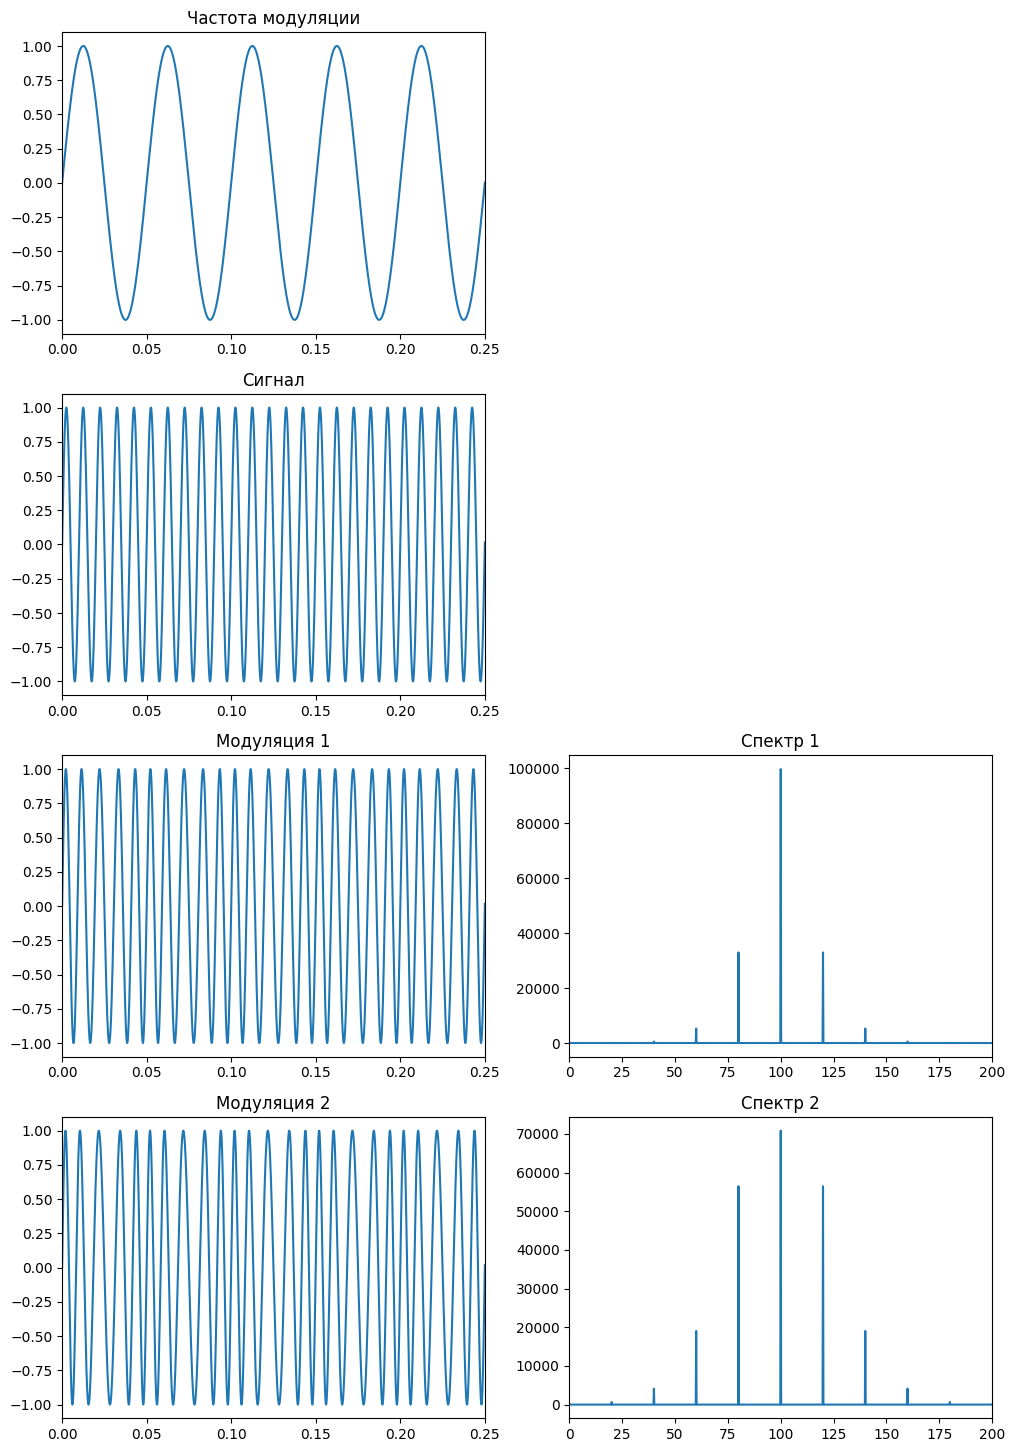

In [44]:
F_m = 20
k_phi = 0.1

x, u_m = generate_wave(F_m, RATE, DURATION)
y_phase_1 = np.sin((2 * np.pi * f_0) * x + (k_phi * 2 * np.pi) * u_m)
y_phase_2 = np.sin((2 * np.pi * f_0) * x + 2 * (k_phi * 2 * np.pi) * u_m)  # индекс в 2 раза больше

spectrum_1 = rfft(y_phase_1)
spectrum_2 = rfft(y_phase_2)

fig, axs = plt.subplots(4, 2)
fig.set_size_inches(12, 18)
axs[0, 1].axis("off")
axs[1, 1].axis("off")
axs[0, 0].plot(x, u_m)
axs[0, 0].set_xlim(0, 0.25)
axs[0, 0].set_title("Частота модуляции")
axs[1, 0].plot(x, y)
axs[1, 0].set_xlim(0, 0.25)
axs[1, 0].set_title("Сигнал")
axs[2, 0].plot(x, y_phase_1)
axs[2, 0].set_xlim(0, 0.25)
axs[2, 0].set_title("Модуляция 1")
axs[3, 0].plot(x, y_phase_2)
axs[3, 0].set_xlim(0, 0.25)
axs[3, 0].set_title("Модуляция 2")
axs[2, 1].plot(x_spectrum, np.abs(spectrum_1))
axs[2, 1].set_xlim([0, 2 * f_0])
axs[2, 1].set_title("Спектр 1")
axs[3, 1].plot(x_spectrum, np.abs(spectrum_2))
axs[3, 1].set_xlim([0, 2 * f_0])
axs[3, 1].set_title("Спектр 2")
plt.show()

Можно заметить, что при увеличении индекса модуляции в 2 раза боковые частоты увеличиились в 2 раза, а также появились новые.

## Частотная модуляция

Приняв амплитуду равной 1, получим формулу $u(t) = \sin(2\pi f_0 t - 2\pi f_m \cos(2\pi F_m t))$.

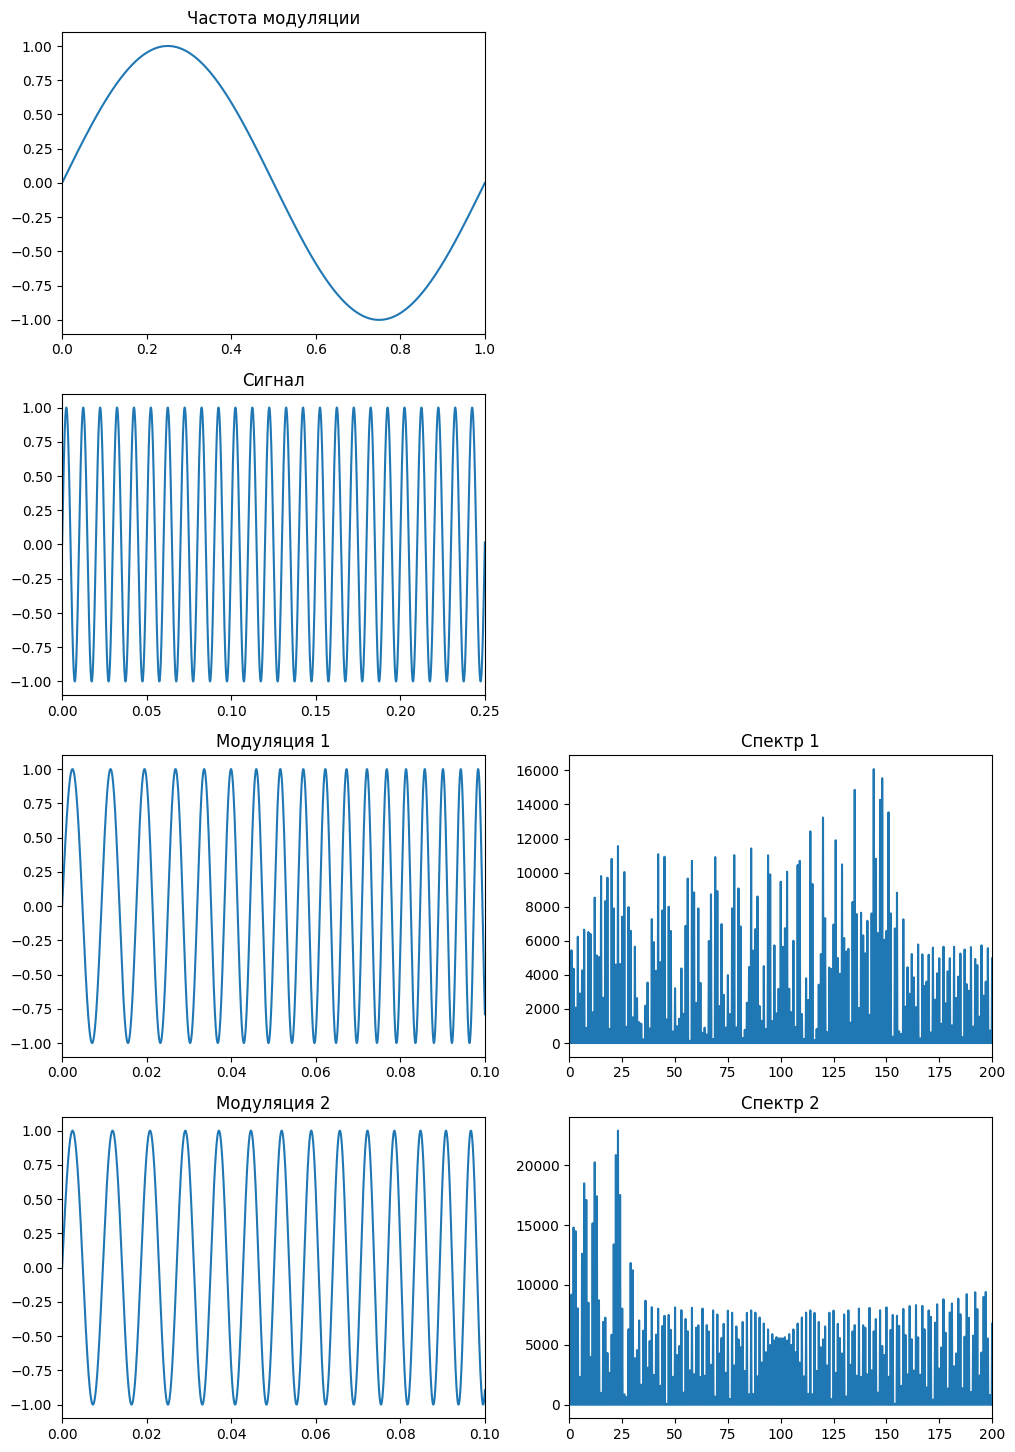

In [52]:
f_m = 40
F_m = 1

x, u_m = generate_wave(F_m, RATE, DURATION)
y_freq_1 = np.sin(2 * np.pi * f_0 * x + (f_m * 2 * np.pi) * (-np.cos(F_m * (2 * np.pi * x))))
y_freq_2 = np.sin(2 * np.pi * f_0 * x + (f_m * 2 * np.pi) / 2 * (-np.cos(F_m * (2 * np.pi * x))))  # девиация в 2 раза меньше

spectrum_1 = rfft(y_freq_1)
spectrum_2 = rfft(y_freq_2)

fig, axs = plt.subplots(4, 2)
fig.set_size_inches(12, 18)
axs[0, 1].axis("off")
axs[1, 1].axis("off")
axs[0, 0].plot(x, u_m)
axs[0, 0].set_xlim(0, 1)
axs[0, 0].set_title("Частота модуляции")
axs[1, 0].plot(x, y)
axs[1, 0].set_xlim(0, 0.25)
axs[1, 0].set_title("Сигнал")
axs[2, 0].plot(x, y_freq_1)
axs[2, 0].set_xlim(0, 0.1)
axs[2, 0].set_title("Модуляция 1")
axs[3, 0].plot(x, y_freq_2)
axs[3, 0].set_xlim(0, 0.1)
axs[3, 0].set_title("Модуляция 2")
axs[2, 1].plot(x_spectrum, np.abs(spectrum_1))
axs[2, 1].set_xlim([0, 2 * f_0])
axs[2, 1].set_title("Спектр 1")
axs[3, 1].plot(x_spectrum, np.abs(spectrum_2))
axs[3, 1].set_xlim([0, 2 * f_0])
axs[3, 1].set_title("Спектр 2")
plt.show()

Чем девиация меньше, тем меньше амплитуда частот в спектре.